In [ ]:
from google.colab import drive
from tensorflow.keras.utils import *
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
n_x = 16
n_y = 16

# Load data

In [ ]:
import pandas as pd
from tensorflow.keras.utils import *

data = pd.read_csv("/content/drive/My Drive/vector/300K_finnal/300k_256_v1.csv")
data = data.drop("id", axis=1)
print(data)


             x_0       x_1       x_2  ...     x_254     x_255  label
0      -0.048629  0.012470  0.007325  ...  0.041314  0.029879      0
1      -0.041992  0.026825  0.013880  ...  0.052775  0.040226      0
2       0.098978 -0.331393  0.588230  ... -0.010934  0.444449      0
3      -0.054822  0.014847  0.027463  ...  0.037730  0.028305      0
4      -0.029561  0.016286 -0.011194  ...  0.089120  0.032448      0
...          ...       ...       ...  ...       ...       ...    ...
358068 -0.096017 -0.002333  0.285492  ...  0.416646  0.082489      1
358069 -0.146059 -0.070191  0.259435  ...  0.341504  0.102825      1
358070 -0.048140  0.155435  0.043301  ...  0.154161  0.017665      1
358071 -0.035542  0.099945  0.049585  ...  0.114557  0.045370      1
358072 -0.138641 -0.064867  0.297599  ...  0.279866  0.083325      1

[358073 rows x 257 columns]


# Process data

In [ ]:
import numpy as np
label = data["label"].to_numpy()
label = np.reshape(label, (label.shape[0], 1))
label = to_categorical(label, num_classes = 2)
feature = data.drop("label", axis=1).to_numpy()

arr = []
for i in feature:
  arr.append(np.reshape(i, (n_x, n_y)).tolist())
feature = np.array(arr)

print(label.shape, feature.shape)
print(label)

(358073, 2) (358073, 16, 16)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state = 42, test_size = 0.2,shuffle = True)

# Create model

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(n_x, n_y)))
model.add(Bidirectional(LSTM(128, return_sequences=False)))

model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


# Training


In [ ]:

import time
model.summary()
t1 = time.time()
history = model.fit(x=X_train, y=y_train, batch_size=72,
                    epochs=48, validation_split = 0.2, shuffle=True)
t2 = time.time()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 16, 256)           148480    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 543,234
Trainable params: 543,234
Non-trainable params: 0
_________________________________________________________________
Epoch 1/48
3183/3183 [==============================] - 40s 11ms/step - loss: 0.1967 - accuracy: 0.9244 - val_loss: 0.1101 - val_accuracy: 0.9575
Epoch 2/48
3183/3183 [==============================] - 34s 11ms/step - loss: 0.1070 - accuracy: 0.9587 - val_loss: 0.0850 - val_accuracy: 0.9674
Epoch 3/48
3183/3183 [==============================] - 34s 11ms/step - loss: 0.0885 -

# Test

In [ ]:
from sklearn.metrics import accuracy_score
t3 = time.time()
y_pred = model.predict(X_test)
t4 = time.time()
label_pred = np.argmax(y_pred, axis = -1)
label_true = np.argmax(y_test, axis = -1)
print(accuracy_score(label_true, label_pred))

0.983313551630245


# Report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

y_pred = model.predict(X_test)
label_pred = np.argmax(y_pred, axis = -1)
label_true = np.argmax(y_test, axis = -1)


print(classification_report(label_true, label_pred))


matrix = confusion_matrix(label_true, label_pred)

print(matrix)

print("\n\n")

print("\n---detail----\n")


print("---precision--- ")
print("macro : ", precision_score(label_true, label_pred, average='macro'))
print("micro : ", precision_score(label_true, label_pred, average='micro'))
print("weighted : ", precision_score(label_true, label_pred, average='weighted'))
print("each class : ", precision_score(label_true, label_pred, average=None))

print("\n---recall--- ")
print("macro : ", recall_score(label_true, label_pred, average='macro'))
print("micro : ", recall_score(label_true, label_pred, average='micro'))
print("weighted : ", recall_score(label_true, label_pred, average='weighted'))
print("each class : ", recall_score(label_true, label_pred, average=None))

print("\n---f1 score--- ")
print("macro : ", f1_score(label_true, label_pred, average='macro'))
print("micro : ", f1_score(label_true, label_pred, average='micro'))
print("weighted : ", f1_score(label_true, label_pred, average='weighted'))
print("each class : ", f1_score(label_true, label_pred, average=None))

print("\n---Acc score--- ")
print(accuracy_score(label_true, label_pred))
print("\n---FPR score--- ")
print(matrix[1][0]/(matrix[1][0]+matrix[1][1]))
print("\n---matrix--- ")
print(matrix)
print("\n---time--- ")
print("train", t2-t1)
print("test", t4-t3)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     57625
           1       0.96      0.95      0.96     13990

    accuracy                           0.98     71615
   macro avg       0.97      0.97      0.97     71615
weighted avg       0.98      0.98      0.98     71615

[[57075   550]
 [  645 13345]]




---detail----

---precision--- 
macro :  0.9746213900810878
micro :  0.983313551630245
weighted :  0.9832758674158848
each class :  [0.98882536 0.96041742]

---recall--- 
macro :  0.9721755855980179
micro :  0.983313551630245
weighted :  0.983313551630245
each class :  [0.99045553 0.95389564]

---f1 score--- 
macro :  0.9733925975035422
micro :  0.983313551630245
weighted :  0.9832919991344289
each class :  [0.98963978 0.95714542]

---Acc score--- 
0.983313551630245

---FPR score--- 
0.046104360257326664

---matrix--- 
[[57075   550]
 [  645 13345]]

---time--- 
train 1680.3610880374908
test 8.401379108428955


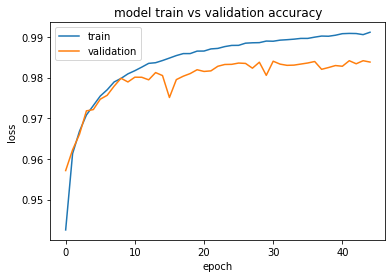

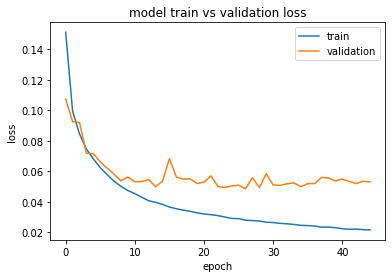

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()